In [ ]:
reuse code from lecture notes - change acc
X and Y
compare lin with random forest

2) differs from normal proces -> only choose good predictors
3) Math expression replace f function of beta distribution in beta and theta with alpha and beta
4) Z is data D is distribution of data refer to defn of Loss wth subscript D generation loss and loss with subscript tau - training loss
i.e when given training sample it is the avg of training loss for each outcome in the sample
treat tau as random variable and treat training sample as random.
5)conclusion - which model is better and why ? fit models correctly
6.x4 as ordinal no encoding but change type to category to help future analysis
x4 as nominal - apply one hot encoding
7)Follow tut example

Question 1

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def CreateDataset(fName, size, seed):
    np.random.seed(seed)
    N = size
    X1 = np.random.gamma(shape=1,scale=1,size=N)
    X2 = np.random.gamma(shape=1,scale=1,size=N)
    X3 = np.random.gamma(shape=1,scale=1,size=N) #Xi ∼ Gamma(1, 1) for i ∈ {1, 2, 3}

    noise = np.random.normal(loc=0.0, scale=2, size=N) #W ∼ N(0, σ2), and σ = 2.

    Y = 0.5*X1 + 3*X2 + 5*X3 + 5*X2*X3 + 2*X1*X2*X3 + noise

    data = np.array([X1, X2, X3 ,Y]).T
    df = pd.DataFrame(data,columns=["radio","tv","internet","sales"])
    #df.to_csv(fName, index=False)
    return df

In [ ]:
df_train = CreateDataset("synthetic_sales_train.csv", 1000, 1)
df_test = CreateDataset("synthetic_sales_test.csv", 1000, 2)


X_train = df_train[['radio', 'tv', 'internet']]
y_train = df_train['sales'].values.reshape(-1,)

#Linear model
lin_reg = sm.OLS(y_train, X_train).fit()
print(lin_reg.summary())

X_test = df_test[['radio', 'tv', 'internet']]
y_test = df_test['sales'].values.reshape(-1,)
y_hat = lin_reg.predict(X_test)
mse_lin = np.mean(np.power((y_test - y_hat), 2))
print("Linear regression mean squared error: ", mse_lin)

#RF
rf_model = RandomForestRegressor(n_estimators=500, random_state=0)
rf_model.fit(X_train, y_train)
y_hat_rf = rf_model.predict(X_test)
mse_rf = np.mean(np.power((y_test - y_hat_rf), 2))
print("Random forest mean squared error: ",mse_rf)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                              2457.
Date:                Tue, 01 Apr 2025   Prob (F-statistic):                        0.00
Time:                        04:14:28   Log-Likelihood:                         -3426.7
No. Observations:                1000   AIC:                                      6859.
Df Residuals:                     997   BIC:                                      6874.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

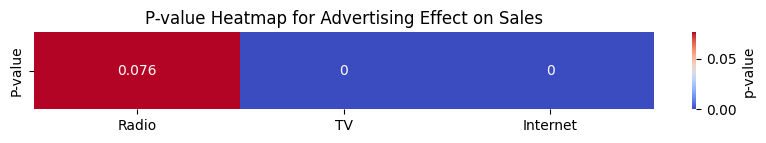

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['Radio', 'TV', 'Internet']
coefficients = [0.3806, 6.5933, 10.1789]
std_errors = [0.214, 0.202, 0.218]
p_values = [0.076, 0.000, 0.000]
lower_bound = [0.3806 - 0.214, 6.5933 - 0.202, 10.1789 - 0.218]  # Lower bound of CI
upper_bound = [0.3806 + 0.214, 6.5933 + 0.202, 10.1789 + 0.218]  # Upper bound of CI

# P-value matrix (for simplicity, we'll use a single row for this example)
p_value_matrix = np.array([p_values])

# Create heatmap
plt.figure(figsize=(10, 1))
sns.heatmap(p_value_matrix, annot=True, cmap="coolwarm", cbar_kws={'label': 'p-value'}, xticklabels=variables, yticklabels=['P-value'])
plt.title('P-value Heatmap for Advertising Effect on Sales')
plt.show()


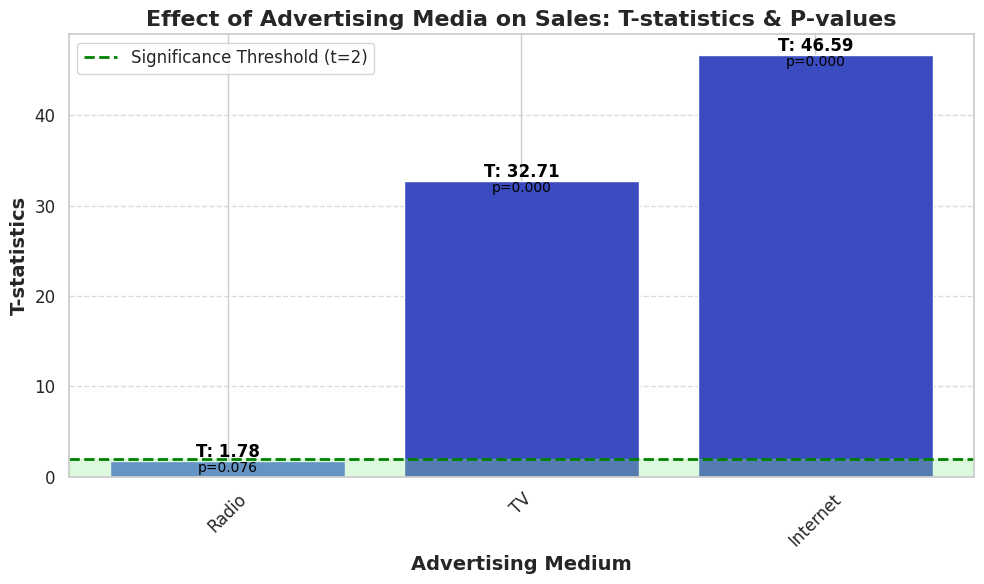

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data
variables = ['Radio', 'TV', 'Internet']
t_statistics = [1.777, 32.714, 46.594]
p_values = [0.076, 0.000, 0.000]

# Define significance threshold
significance_threshold = 0.05

# Set a seaborn style for the plot
sns.set(style="whitegrid", palette="muted")

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars with a smooth color gradient based on significance
bars = ax.bar(variables, t_statistics, color=sns.color_palette("coolwarm", as_cmap=True)(p_values))

# Add p-value and t-statistics on top of bars
for i, (t_stat, p_val) in enumerate(zip(t_statistics, p_values)):
    ax.text(i, t_stat, f'T: {t_stat:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
    ax.text(i, t_stat, f'p={p_val:.3f}', ha='center', va='top', fontsize=10, color='black')

# Add significance threshold lines and shaded region
ax.axhline(y=2, color='green', linestyle='--', linewidth=2, label="Significance Threshold (t=2)")
ax.axhspan(0, 2, color='lightgreen', alpha=0.3)

# Customize the plot for aesthetics
ax.set_xlabel('Advertising Medium', fontsize=14, fontweight='bold')
ax.set_ylabel('T-statistics', fontsize=14, fontweight='bold')
ax.set_title('Effect of Advertising Media on Sales: T-statistics & P-values', fontsize=16, fontweight='bold')

# Customize ticks and gridlines
ax.tick_params(axis='x', rotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend at the top left
ax.legend(loc='upper left', fontsize=12)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


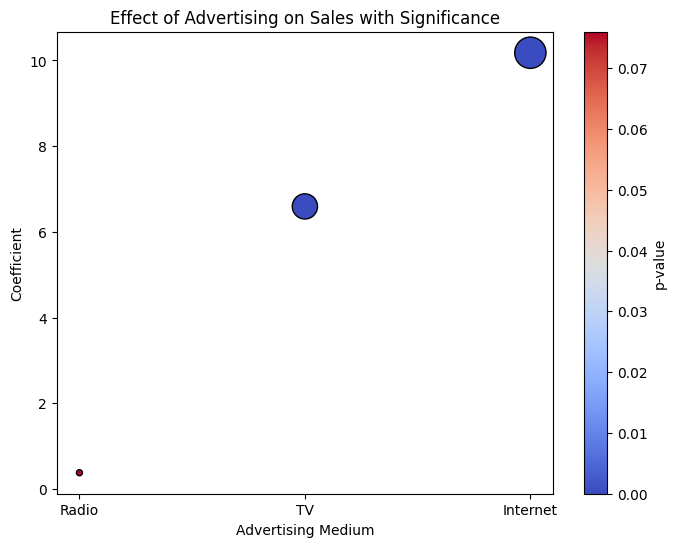

In [ ]:
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(variables, coefficients, s=[abs(coef)*50 for coef in coefficients], c=p_values, cmap='coolwarm', edgecolors='black')

# Adding labels and title
plt.xlabel('Advertising Medium')
plt.ylabel('Coefficient')
plt.title('Effect of Advertising on Sales with Significance')
plt.colorbar(label='p-value')  # Colorbar to show significance

# Show plot
plt.show()


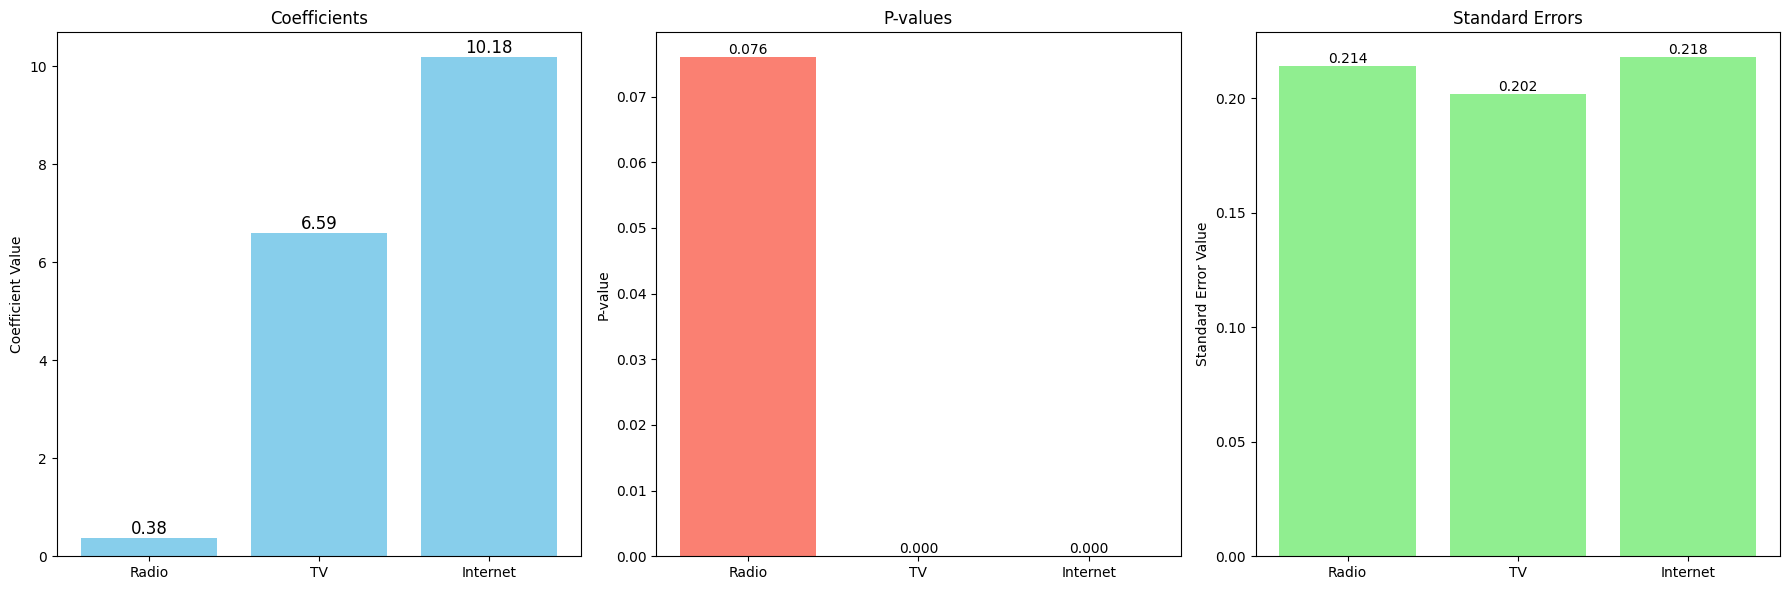

In [ ]:
import matplotlib.pyplot as plt

# Data
variables = ['Radio', 'TV', 'Internet']
coefficients = [0.3806, 6.5933, 10.1789]
p_values = [0.076, 0.000, 0.000]
std_errors = [0.214, 0.202, 0.218]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Coefficient plot
axes[0].bar(variables, coefficients, color='skyblue')
axes[0].set_title('Coefficients')
axes[0].set_ylabel('Coefficient Value')
# Adding values on top of bars
for i, v in enumerate(coefficients):
    axes[0].text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

# P-value plot
axes[1].bar(variables, p_values, color='salmon')
axes[1].set_title('P-values')
axes[1].set_ylabel('P-value')
# Adding values on top of bars
for i, v in enumerate(p_values):
    axes[1].text(i, v, f'{v:.3f}', ha='center', va='bottom', fontsize=10)

# Standard Error plot
axes[2].bar(variables, std_errors, color='lightgreen')
axes[2].set_title('Standard Errors')
axes[2].set_ylabel('Standard Error Value')
# Adding values on top of bars
for i, v in enumerate(std_errors):
    axes[2].text(i, v, f'{v:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


with  intercept

In [ ]:
X_train_with_intercept = sm.add_constant(X_train)
X_test_with_intercept = sm.add_constant(X_test)

# Linear model with intercept
lin_reg = sm.OLS(y_train, X_train_with_intercept).fit()
print(lin_reg.summary())

# Prediction and error metrics
y_hat = lin_reg.predict(X_test_with_intercept)
print("Linear regression with intercept mean squared error: ",
    np.mean(np.power((y_test- y_hat),2)))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     1558.
Date:                Tue, 01 Apr 2025   Prob (F-statistic):               0.00
Time:                        04:55:00   Log-Likelihood:                -3292.4
No. Observations:                1000   AIC:                             6593.
Df Residuals:                     996   BIC:                             6612.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.3415      0.419    -17.513      0.0

Comparison of mean squared errors across models

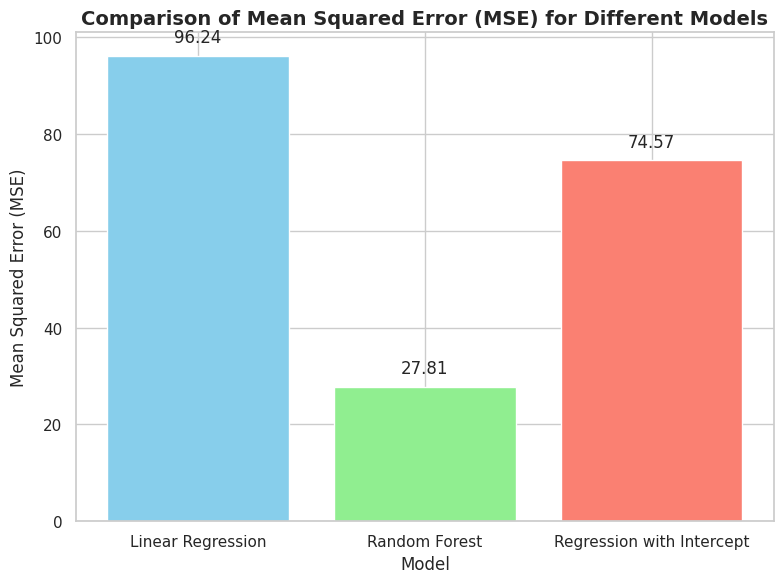

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for MSE values
models = ['Linear Regression', 'Random Forest', 'Regression with Intercept']
mse_values = [96.23693654990437, 27.810722594320993, 74.56753771040972]

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, mse_values, color=['skyblue', 'lightgreen', 'salmon'])

# Adding titles and labels
plt.title('Comparison of Mean Squared Error (MSE) for Different Models', fontsize=14, fontweight='bold')
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.xlabel('Model', fontsize=12)

# Adding the MSE value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


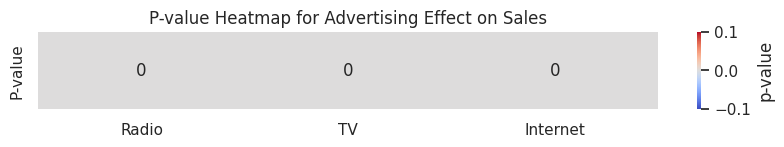

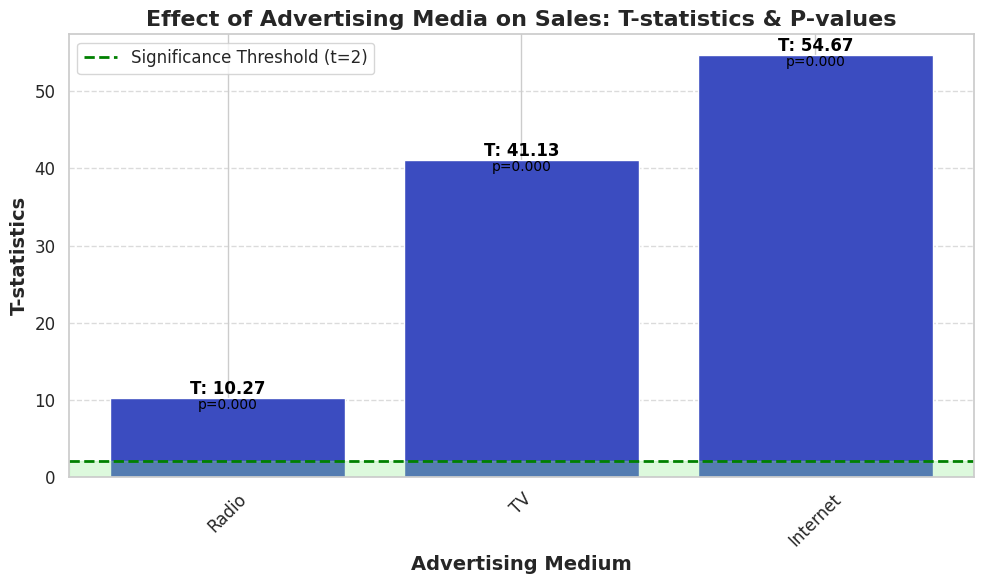

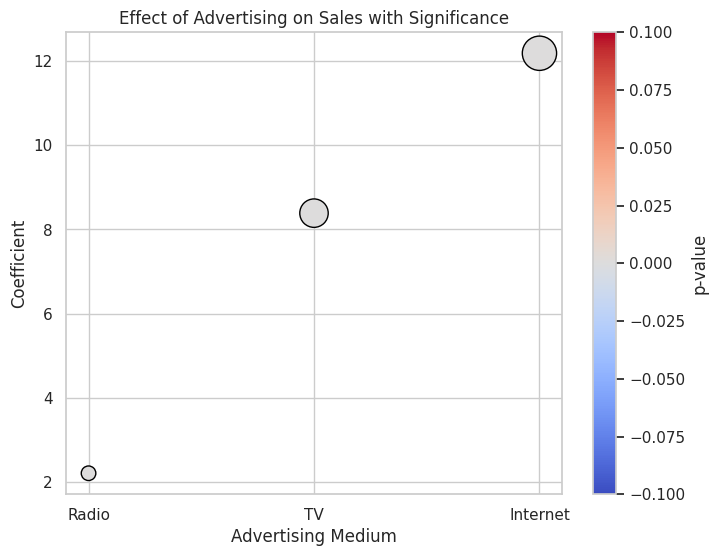

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data from OLS results
variables = ['Radio', 'TV', 'Internet']
coefficients = [2.1996, 8.3879, 12.1923]  # From OLS output
std_errors = [0.214, 0.204, 0.223]  # Standard errors from OLS output
p_values = [0.000, 0.000, 0.000]  # P-values from OLS output
t_statistics = [10.266, 41.131, 54.667]  # t-statistics from OLS output

# P-value Heatmap
p_value_matrix = np.array([p_values])
plt.figure(figsize=(10, 1))
sns.heatmap(p_value_matrix, annot=True, cmap="coolwarm", cbar_kws={'label': 'p-value'}, xticklabels=variables, yticklabels=['P-value'])
plt.title('P-value Heatmap for Advertising Effect on Sales')
plt.show()

# T-statistics Bar Plot
significance_threshold = 2
sns.set(style="whitegrid", palette="muted")

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(variables, t_statistics, color=sns.color_palette("coolwarm", as_cmap=True)(p_values))

# Adding text annotations for t-statistics and p-values
for i, (t_stat, p_val) in enumerate(zip(t_statistics, p_values)):
    ax.text(i, t_stat, f'T: {t_stat:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
    ax.text(i, t_stat, f'p={p_val:.3f}', ha='center', va='top', fontsize=10, color='black')

# Adding significance threshold lines
ax.axhline(y=significance_threshold, color='green', linestyle='--', linewidth=2, label="Significance Threshold (t=2)")
ax.axhspan(0, significance_threshold, color='lightgreen', alpha=0.3)

# Customize the plot for aesthetics
ax.set_xlabel('Advertising Medium', fontsize=14, fontweight='bold')
ax.set_ylabel('T-statistics', fontsize=14, fontweight='bold')
ax.set_title('Effect of Advertising Media on Sales: T-statistics & P-values', fontsize=16, fontweight='bold')

# Customize ticks and gridlines
ax.tick_params(axis='x', rotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a legend
ax.legend(loc='upper left', fontsize=12)

# Tight layout
plt.tight_layout()
plt.show()

# Coefficient and Significance Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(variables, coefficients, s=[abs(coef)*50 for coef in coefficients], c=p_values, cmap='coolwarm', edgecolors='black')

# Adding labels and title
plt.xlabel('Advertising Medium')
plt.ylabel('Coefficient')
plt.title('Effect of Advertising on Sales with Significance')
plt.colorbar(label='p-value')  # Colorbar to show significance

# Show plot
plt.show()


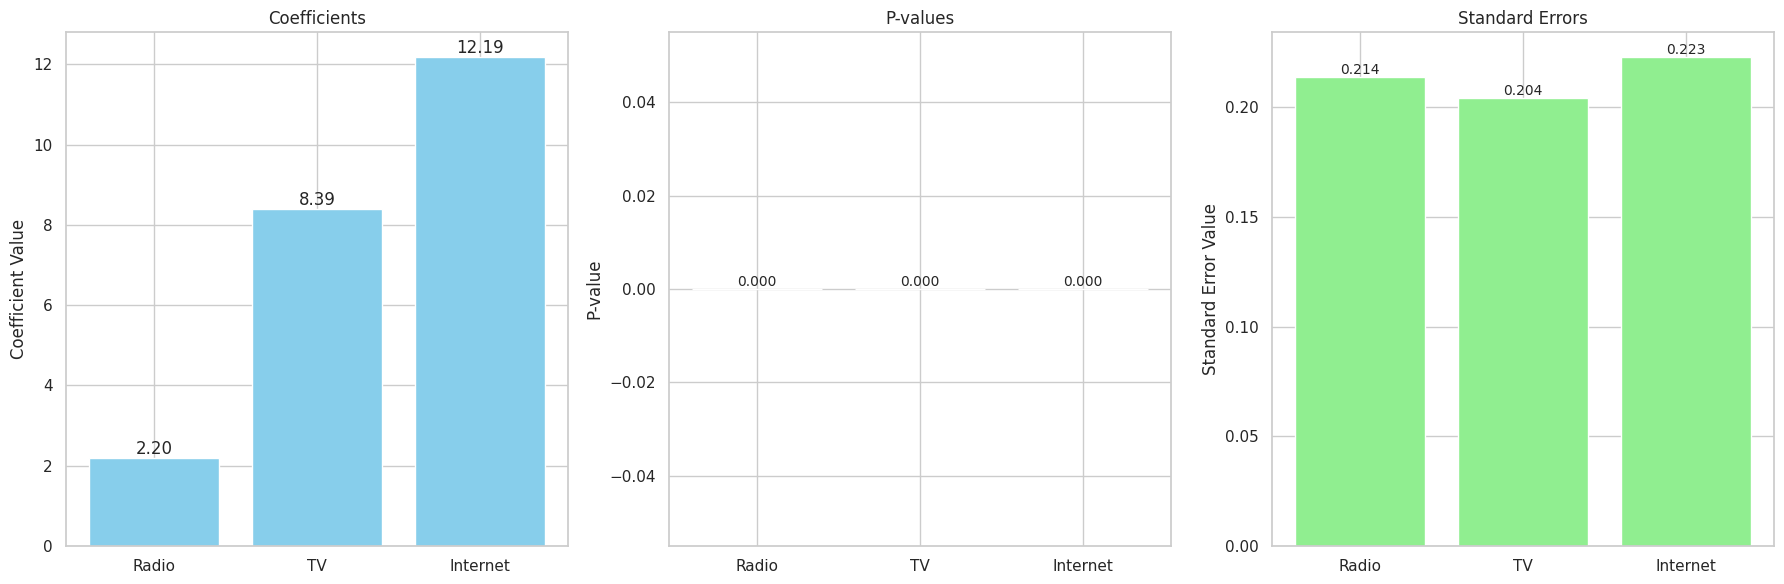

In [ ]:
import matplotlib.pyplot as plt

# Data from OLS results
variables = ['Radio', 'TV', 'Internet']
coefficients = [2.1996, 8.3879, 12.1923]  # Coefficients from OLS output
p_values = [0.000, 0.000, 0.000]  # P-values from OLS output
std_errors = [0.214, 0.204, 0.223]  # Standard errors from OLS output

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Coefficient plot
axes[0].bar(variables, coefficients, color='skyblue')
axes[0].set_title('Coefficients')
axes[0].set_ylabel('Coefficient Value')
# Adding values on top of bars
for i, v in enumerate(coefficients):
    axes[0].text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

# P-value plot
axes[1].bar(variables, p_values, color='salmon')
axes[1].set_title('P-values')
axes[1].set_ylabel('P-value')
# Adding values on top of bars
for i, v in enumerate(p_values):
    axes[1].text(i, v, f'{v:.3f}', ha='center', va='bottom', fontsize=10)

# Standard Error plot
axes[2].bar(variables, std_errors, color='lightgreen')
axes[2].set_title('Standard Errors')
axes[2].set_ylabel('Standard Error Value')
# Adding values on top of bars
for i, v in enumerate(std_errors):
    axes[2].text(i, v, f'{v:.3f}', ha='center', va='bottom', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Question 5

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

data = {
    'x': [0, 1, 2, 3, 4],
    'y': [2, 4, 6, 4, 2]
}

df = pd.DataFrame(data)

# Model 1: y = β0 + ε
X1 = np.ones((df.shape[0], 1))
y = df['y']
model1 = sm.OLS(y, X1).fit()
y_pred1 = model1.predict(X1)


# Model 2: y = β1x + ε
X2 = df['x'].values.reshape(-1, 1)
model2 = sm.OLS(y, X2).fit()
y_pred2 = model2.predict(X2)


coefficients = {
    'Model': ['Model1', 'Model2'],
    'β0': [model1.params[0], None],
    'β1': [None, model2.params[0]]
}

coefficients_df = pd.DataFrame(coefficients)
print(coefficients_df)


    Model   β0   β1
0  Model1  3.6  NaN
1  Model2  NaN  1.2


<ipython-input-5-c675fad9f6f6>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'β0': [model1.params[0], None],
<ipython-input-5-c675fad9f6f6>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'β1': [None, model2.params[0]]


In [ ]:
# Mean Squared Error (MSE)
mse1 = np.mean((y - y_pred1)**2)
mse2 = np.mean((y - y_pred2)**2)

# Avg Absolute Error (AE)
ae1 = np.mean(np.abs(y - y_pred1))
ae2 = np.mean(np.abs(y - y_pred2))

# Avg L1.5 Loss
l1_5_loss1 = np.mean(np.abs(y - y_pred1)**1.5)
l1_5_loss2 = np.mean(np.abs(y - y_pred2)**1.5)

results = {
    'Model': ['Model1', 'Model2'],
    'Mean Squared Error Loss': [mse1, mse2],
    'Absolute Error Loss': [ae1, ae2],
    'L1.5 Loss': [l1_5_loss1, l1_5_loss2]
}

results_df = pd.DataFrame(results)

print(results_df)

    Model  Mean Squared Error Loss  Absolute Error Loss  L1.5 Loss
0  Model1                     2.24                 1.28   1.654349
1  Model2                     6.56                 2.32   3.856504


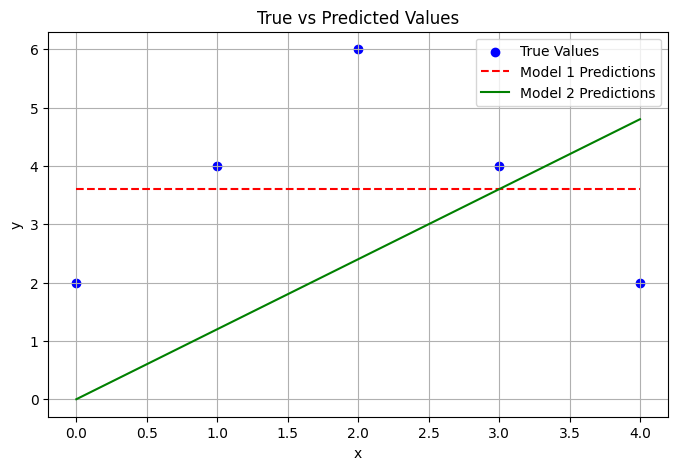

In [ ]:
import matplotlib.pyplot as plt

# Plot the true vs predicted values
plt.figure(figsize=(8, 5))

# Plot true values
plt.scatter(df['x'], df['y'], color='blue', label='True Values', marker='o')

# Plot Model 1 predictions (constant)
plt.plot(df['x'], y_pred1, color='red', linestyle='--', label='Model 1 Predictions')

# Plot Model 2 predictions (linear)
plt.plot(df['x'], y_pred2, color='green', linestyle='-', label='Model 2 Predictions')

# Labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('True vs Predicted Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Question 6

In [ ]:
import pandas as pd

df = pd.read_csv("data.csv")
df1 = df.copy()
df.head()

,x1,x2,x3,x4,y
0,0.015201,0.164172,0.170766,2.0,-0.954396
1,0.624885,0.500777,0.862133,3.0,1.874654
2,0.388495,0.057511,0.009826,1.0,3.165485
3,0.233333,0.752479,0.139151,1.0,2.700000
4,0.433483,0.379151,0.065308,2.0,0.300449


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      30 non-null     float64
 1   x2      30 non-null     float64
 2   x3      30 non-null     float64
 3   x4      30 non-null     float64
 4   y       30 non-null     float64
dtypes: float64(5)
memory usage: 1.3 KB


In [ ]:
df['x4'] = df['x4'].astype("category")
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   x1      30 non-null     float64 
 1   x2      30 non-null     float64 
 2   x3      30 non-null     float64 
 3   x4      30 non-null     category
 4   y       30 non-null     float64 
dtypes: category(1), float64(4)
memory usage: 1.2 KB


In [ ]:
df1=pd.get_dummies(df1 , columns = ['x4'], dtype=float)
df1.head()

,x1,x2,x3,y,x4_1.0,x4_2.0,x4_3.0
0,0.015201,0.164172,0.170766,-0.954396,0.0,1.0,0.0
1,0.624885,0.500777,0.862133,1.874654,0.0,0.0,1.0
2,0.388495,0.057511,0.009826,3.165485,1.0,0.0,0.0
3,0.233333,0.752479,0.139151,2.700000,1.0,0.0,0.0
4,0.433483,0.379151,0.065308,0.300449,0.0,1.0,0.0


In [ ]:
X1=df1.drop(['y'],axis=1)
Y1=df1['y']
X=df.drop(['y'],axis=1)
Y=df['y']

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

def cv_error(X,Y):
  model = LinearRegression()
  score = -cross_val_score(model,X,Y,cv=10,scoring='neg_mean_squared_error')
  return np.mean(score)#1-score.mean() # or 1 - np.mean(scores)


print("Lin reg with ordinal:{}".format(cv_error(X,Y)))
print("Lin reg with nominal:{}".format(cv_error(X1,Y1)))



Lin reg with ordinal:1.195839915845576
Lin reg with nominal:1.7555557617402597e-30


<ipython-input-19-77ecab53362e>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ordinal = df.groupby('x4')['y'].mean()


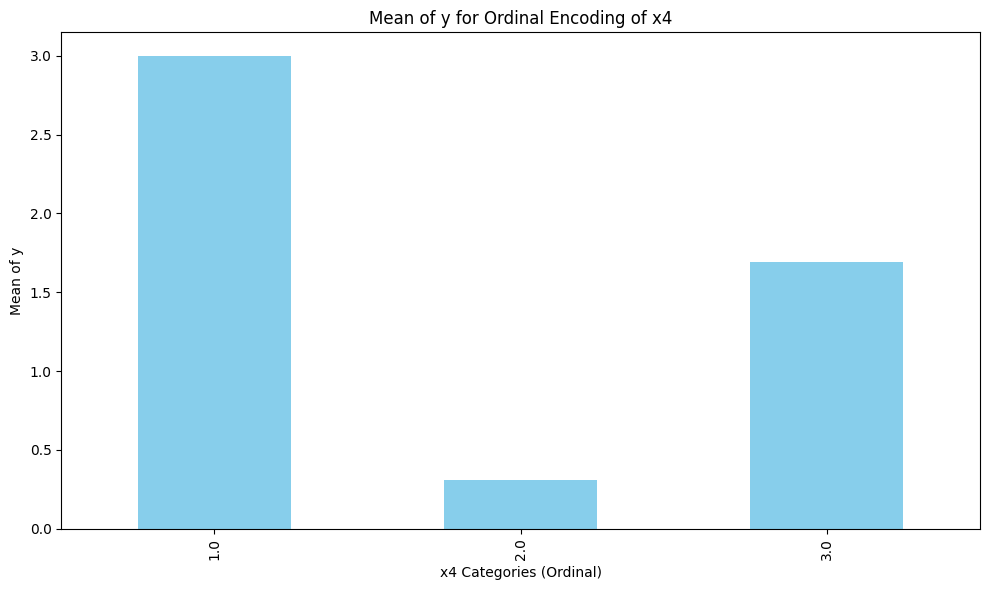

In [ ]:
plt.figure(figsize=(10, 6))

df_ordinal = df.groupby('x4')['y'].mean()

df_ordinal.plot(kind='bar', color='skyblue')
plt.title('Mean of y for Ordinal Encoding of x4')
plt.xlabel('x4 Categories (Ordinal)')
plt.ylabel('Mean of y')


plt.tight_layout()
plt.show()


QUESTION 7

In [ ]:
import numpy as np

#simulate pts in unit sqr uniformly

N=10000

X = np.random.uniform(low=2,high=6,size=N)

def f(x):
  return 1 + 2*x**2 - 3*np.sin(x)
Y=f(X)

I = (6-2)*Y

est = np.mean(I) #estimate of indicator of area of R

print(est) #different results coz its a simulation process and random X and y
#so how do we know if estimate is good enough ? we do MC coz we dont know true val --> which is why CI is also calculated

se = np.std(I)/np.sqrt(N) # std error
print(se)

CI = [est - 1.96*se, est + 1.96*se] #1.96 is multiplier/critical val for 95% CI
print(CI)
#CI is centered around point estimate and width is approx 4 times std error and radius 2 times
#if I increase N i will decrease std error and CI range will shorten

147.3336052757781
0.7985762533219112
[np.float64(145.76839581926714), np.float64(148.89881473228905)]
